In [1]:
import pandas as pd
import numpy as np
import glob
import os
import munge_help
from time import time

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,plot_roc_curve,plot_precision_recall_curve,plot_confusion_matrix, classification_report

from tqdm import tqdm


import utils

import xgboost as xgb

# Load Data

In [2]:
metrics_paths = glob.glob('classification_dicts/*')

In [8]:
num_boot = len(metrics_paths)
print("Total number of trials = {}".format(num_boot))

Total number of trials = 2201


In [3]:
recall_arr = []
precision_arr = []
f1_arr = []

#loop over each path
for path in metrics_paths:
    #load the dict
    metrics_dict = utils.load_obj(path)
    
    #append the arrays
    recall_arr.append(metrics_dict['1']['recall'])
    precision_arr.append(metrics_dict['1']['precision']) 
    f1_arr.append(metrics_dict['1']['f1-score'])


In [4]:
#the numpy way
np.percentile(precision_arr, [2.5, 97.5])

array([0.14285714, 0.24264706])

In [5]:
np.percentile(recall_arr, [2.5, 97.5])

array([0.31666667, 0.56666667])

In [6]:
np.percentile(f1_arr, [2.5, 97.5])

array([0.19791667, 0.33653846])

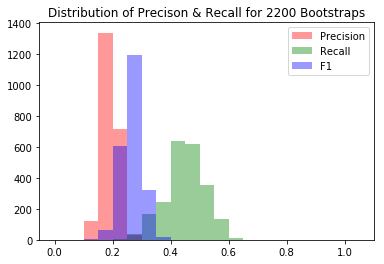

In [19]:
plt.hist(precision_arr, bins=np.arange(0, 1.1, 0.05),
         label='Precision', 
         color='red',
         alpha=0.4)


plt.hist(recall_arr, bins=np.arange(0, 1.1, 0.05),
         label='Recall',
         alpha=0.4,
         color='green')


plt.hist(f1_arr, bins=np.arange(0, 1.1, 0.05),
         alpha=0.4,
         label='F1',
         color='blue')

plt.legend()

plt.title("Distribution of Precison & Recall for 2200 Bootstraps".format(num_boot))
plt.savefig(os.path.join('plots', 'precision_recall_hist.png'))